In [3]:
import pandas as pd
df = pd.read_csv('C:/Users/User/Desktop/Titanic-Dataset.csv')
import matplotlib.pyplot as plt
import seaborn as sns


In [52]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


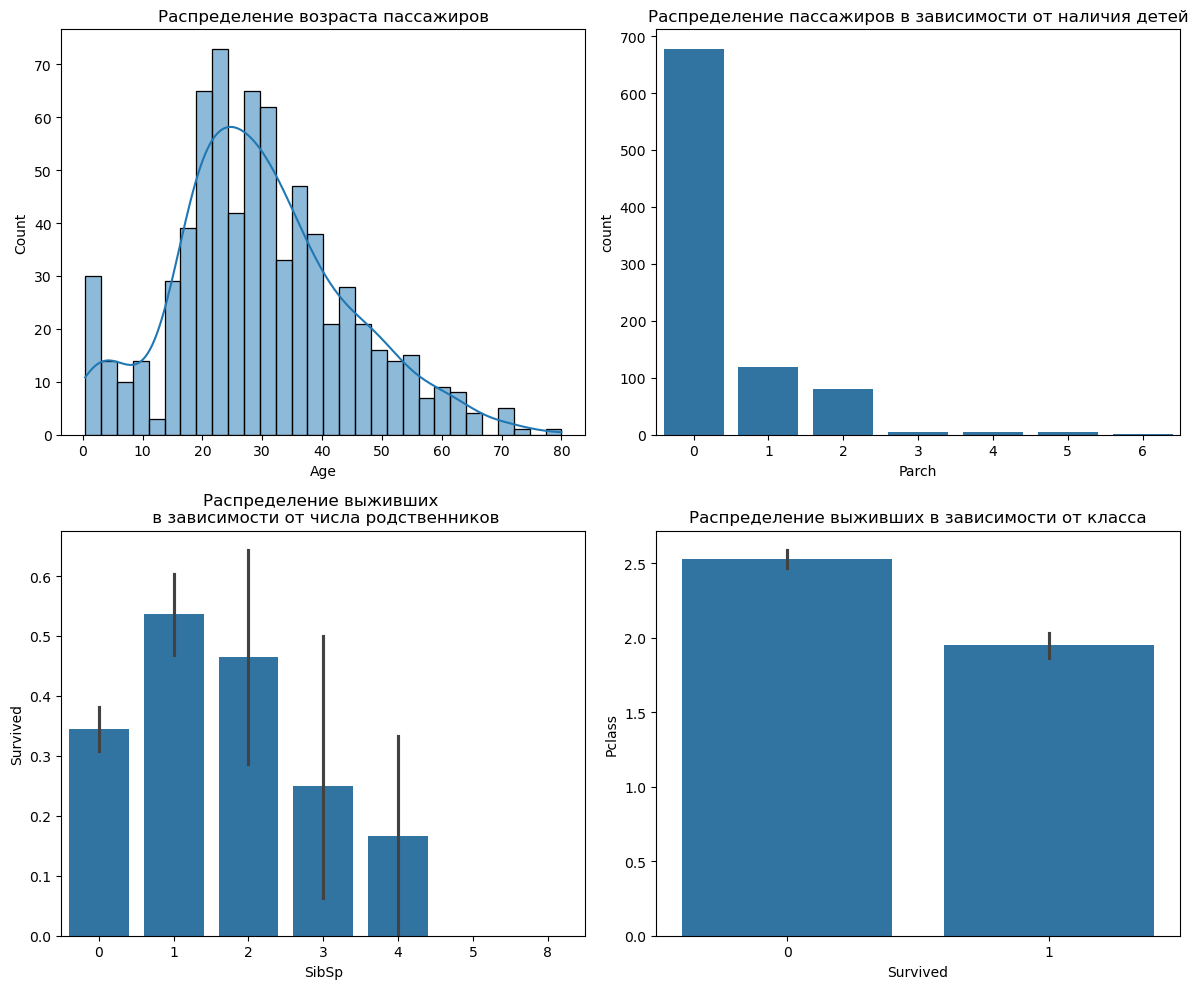

In [53]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

sns.histplot(data=df, x="Age", kde=True, ax=axes[0,0], bins=30) 
axes[0,0].set_title("Распределение возраста пассажиров")
sns.countplot(data=df, x="Parch", ax=axes[0,1])
axes[0,1].set_title("Распределение пассажиров в зависимости от наличия детей")
sns.barplot(data=df, x="SibSp", y="Survived", estimator="mean", ax=axes[1,0])
axes[1,0].set_title("Распределение выживших \n в зависимости от числа родственников")
sns.barplot(data=df, x="Survived", y = "Pclass", ax=axes[1,1], estimator="mean")
axes[1,1].set_title("Распределение выживших в зависимости от класса")
plt.tight_layout()
plt.show()

In [54]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


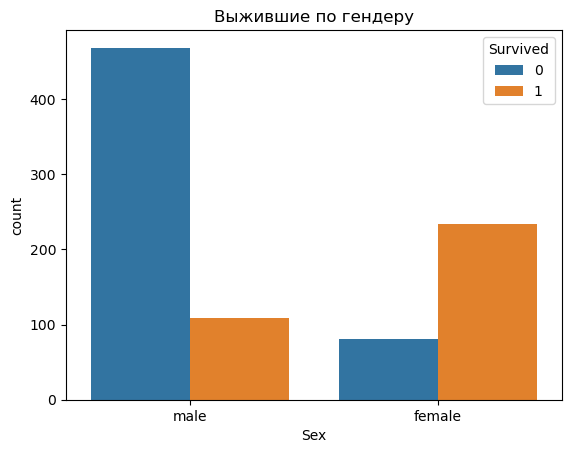

In [55]:
plt.figure()
sns.countplot(data=df, x='Sex', hue='Survived')
plt.title('Выжившие по гендеру')
plt.show()

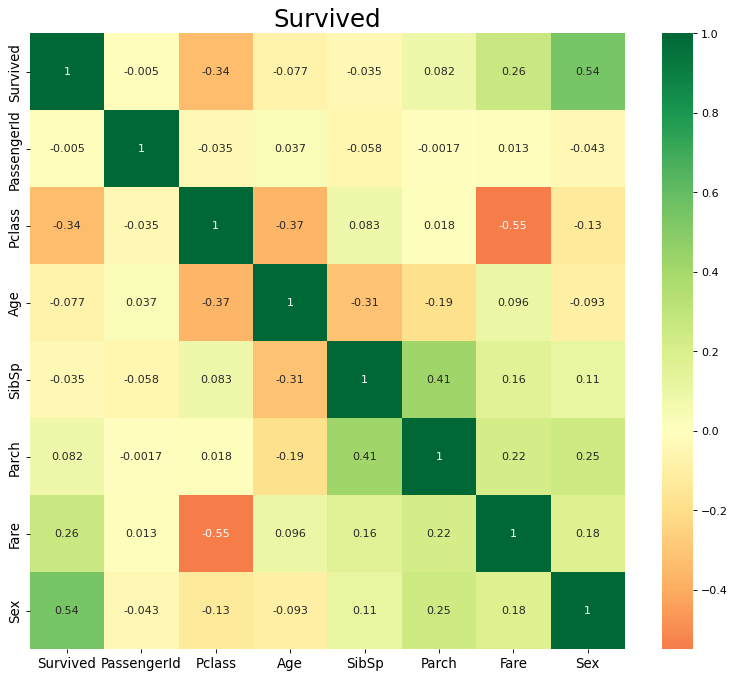

In [57]:
heatdf = df[['Survived', 'PassengerId','Pclass', 'Age','SibSp','Parch','Fare', 'Sex']]

plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(heatdf.corr(), xticklabels=heatdf.corr().columns, yticklabels=heatdf.corr().columns, cmap='RdYlGn', center=0, annot=True)

plt.title('Survived', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [58]:
df["LastName"] = df["Name"].str.split(",").str[0]
df["FamilySize"] = df["SibSp"] + df["Parch"] 


In [59]:
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,LastName,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,Futrelle,1
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,Allen,0


In [1]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [4]:
df.loc[df.Sex == 'female', 'Sex'] = 1
df.loc[df.Sex == 'male', 'Sex'] = 0

In [5]:
df.loc[df.Embarked == 'S', 'Embarked'] = 0
df.loc[df.Embarked == 'C', 'Embarked'] = 1
df.loc[df.Embarked == 'Q', 'Embarked'] = 2

In [6]:
median_age = df['Age'].median()
df['Age'] = df['Age'].fillna(median_age)
median_age = df['Embarked'].median()
df['Embarked'] = df['Embarked'].fillna(median_age)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    float64
dtypes: float64(3), int64(5), object(4)
memory usage: 83.7+ KB


In [10]:
#df = df.drop(columns=['Ticket', 'Name', 'PassengerId', 'Cabin'])

In [11]:
#df = df.drop(columns=['Cabin'])

In [12]:
df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [28]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0.0
1,1,1,1,38.0,1,0,71.2833,1.0
2,1,3,1,26.0,0,0,7.9250,0.0
3,1,1,1,35.0,1,0,53.1000,0.0
4,0,3,0,35.0,0,0,8.0500,0.0
...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000,0.0
887,1,1,1,19.0,0,0,30.0000,0.0
888,0,3,1,28.0,1,2,23.4500,0.0
889,1,1,0,26.0,0,0,30.0000,1.0


In [29]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)
np.random.seed(42)
kmeans = KMeans(n_clusters = 3, random_state = 42, n_init = 'auto')
kmeans.fit(X_scaled)
print(f"MSE: {kmeans.inertia_}")

MSE: 4833.154184107041


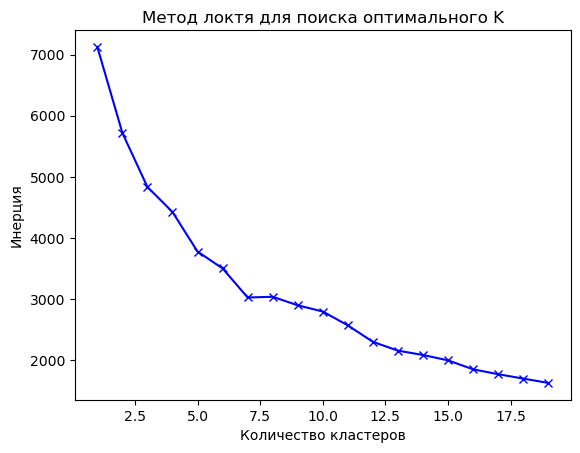

In [31]:
np.random.seed(42)
distortions = []
K = range(1, 20)
for k in K:
    model = KMeans(n_clusters = k, random_state = 42, n_init = 'auto').fit(X_scaled)
    distortions.append(model.inertia_)

plt.plot(K, distortions, 'bx-')
plt.xlabel('Количество кластеров')
plt.ylabel('Инерция')
plt.title('Метод локтя для поиска оптимального K')
plt.show()

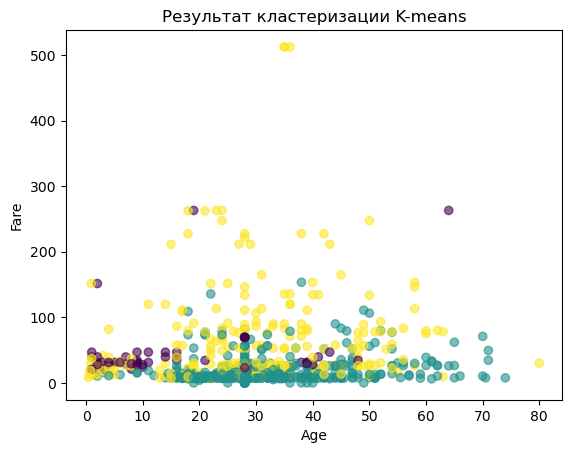

In [45]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init='auto')
kmeans.fit(X_scaled)

labels = kmeans.labels_          # Номера кластеров для каждой точки
centroids = kmeans.cluster_centers_  # Координаты центров кластеров
# Добавляем результаты в исходный DataFrame
df['Cluster'] = labels

plt.scatter(df['Age'], df['Fare'], c=df['Cluster'], cmap='viridis', alpha=0.6)
plt.title('Результат кластеризации K-means')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()

In [33]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)
np.random.seed(42)
kmeans = KMeans(n_clusters = 6, random_state = 42, n_init = 'auto')
kmeans.fit(X_scaled)
print(f"MSE: {kmeans.inertia_}")#сумма квадратов расстояний между объектами и их центроидом

MSE: 3498.722502929004


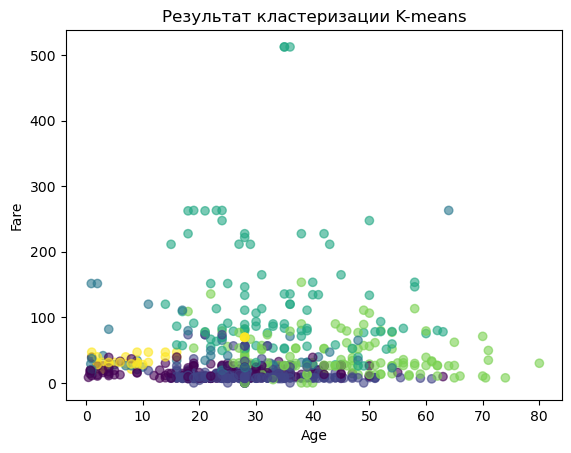

In [34]:
kmeans = KMeans(n_clusters = 6, random_state=42, n_init='auto')
kmeans.fit(X_scaled)

labels = kmeans.labels_         
centroids = kmeans.cluster_centers_ 
df['Cluster'] = labels

plt.scatter(df['Age'], df['Fare'], c=df['Cluster'], cmap='viridis', alpha=0.6)
plt.title('Результат кластеризации K-means')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()

<Figure size 1000x600 with 0 Axes>

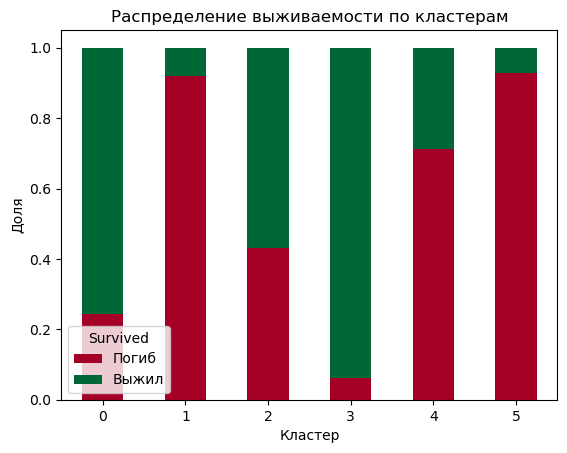

In [38]:
plt.figure(figsize=(10, 6))
survival_by_cluster = pd.crosstab(df['Cluster'], df['Survived'], normalize='index')
survival_by_cluster.plot(kind='bar', stacked=True, colormap='RdYlGn')
plt.title('Распределение выживаемости по кластерам')
plt.xlabel('Кластер')
plt.ylabel('Доля')
plt.legend(['Погиб', 'Выжил'], title='Survived')
plt.xticks(rotation=0)
plt.show()

<Figure size 1200x800 with 0 Axes>

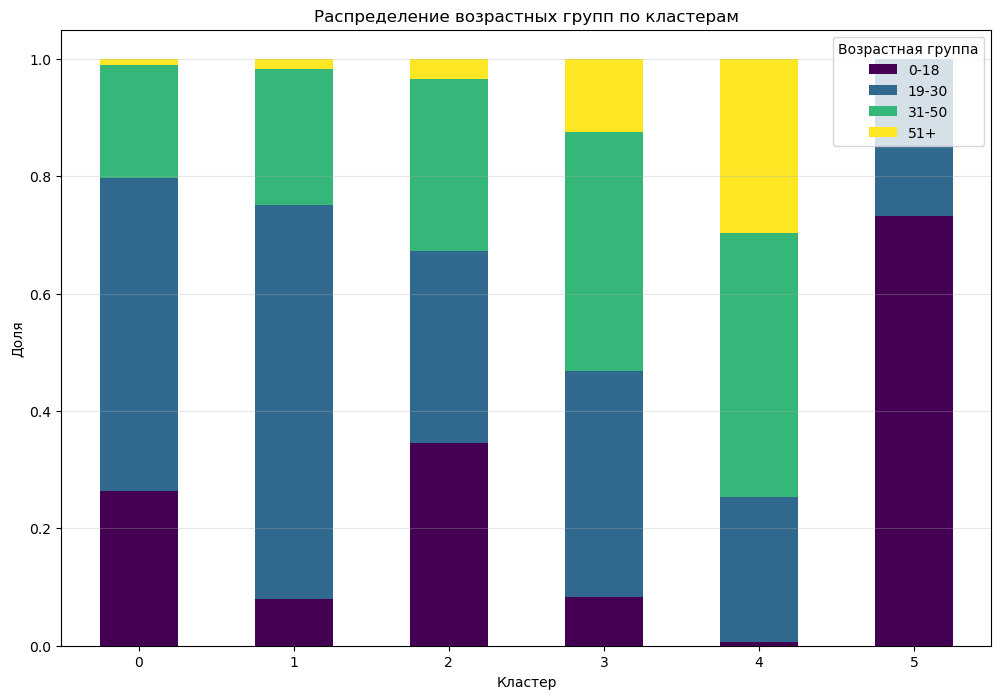

In [73]:
plt.figure(figsize=(12, 8))

df['AgeGroup'] = pd.cut(df['Age'], 
                        bins=[0, 18, 30, 50, 100], 
                        labels=['0-18', '19-30', '31-50', '51+'])

age_by_cluster = pd.crosstab(df['Cluster'], df['AgeGroup'], normalize='index')

age_by_cluster.plot(kind='bar', stacked=True, colormap='viridis', figsize=(12, 8))
plt.title('Распределение возрастных групп по кластерам')
plt.xlabel('Кластер')
plt.ylabel('Доля')
plt.legend(title='Возрастная группа')
plt.xticks(rotation=0)
plt.grid(True, alpha=0.3, axis='y')
plt.show()

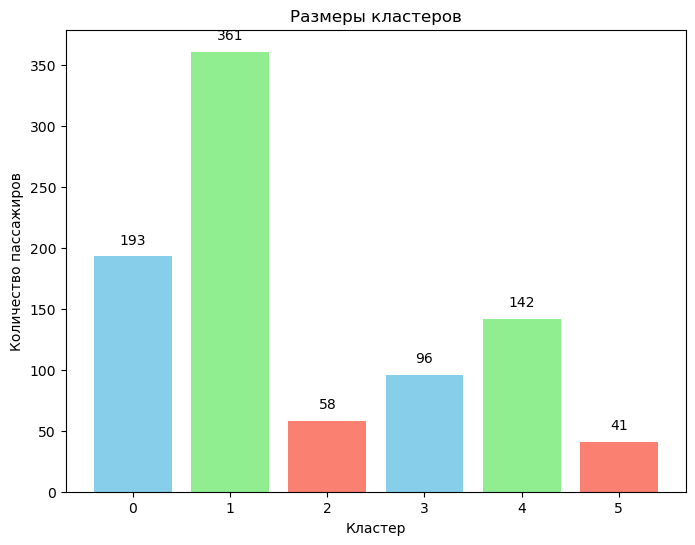

In [74]:
plt.figure(figsize=(8, 6))
cluster_counts = df['Cluster'].value_counts().sort_index()
plt.bar(cluster_counts.index, cluster_counts.values, color=['skyblue', 'lightgreen', 'salmon'])
plt.title('Размеры кластеров')
plt.xlabel('Кластер')
plt.ylabel('Количество пассажиров')
for i, v in enumerate(cluster_counts.values):
    plt.text(i, v + 10, str(v), ha='center')
plt.show()


<Figure size 1000x600 with 0 Axes>

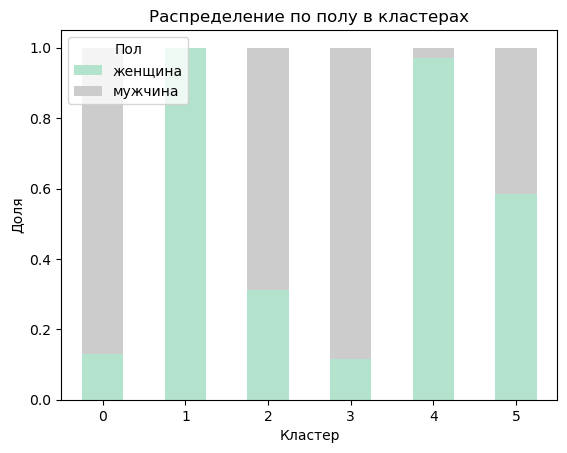

In [75]:
plt.figure(figsize=(10, 6))
gender_by_cluster = pd.crosstab(df['Cluster'], df['Sex'].map({0: 'женщина', 1: 'мужчина'}), normalize='index')
gender_by_cluster.plot(kind='bar', stacked=True, colormap='Pastel2')
plt.title('Распределение по полу в кластерах')
plt.xlabel('Кластер')
plt.ylabel('Доля')
plt.legend(title='Пол')
plt.xticks(rotation=0)
plt.show()

<Figure size 1200x800 with 0 Axes>

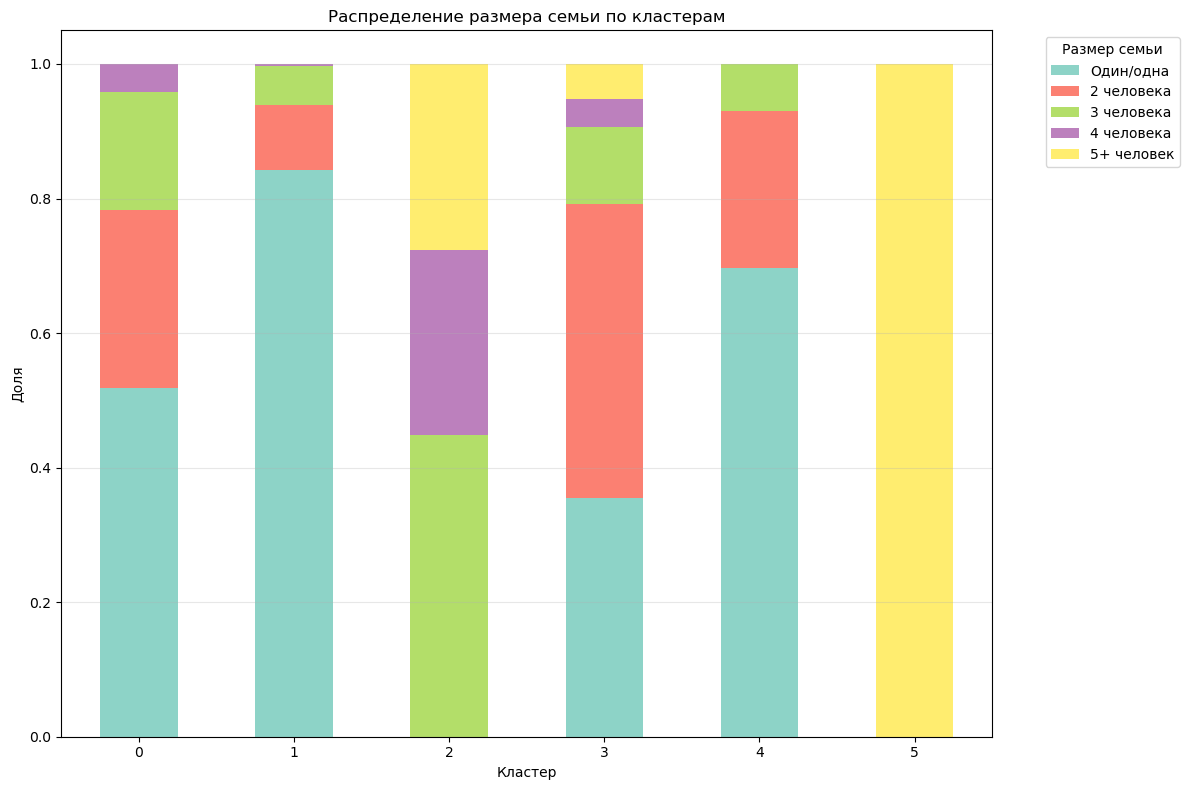

In [76]:
df['FamilySize'] = df['SibSp'] + df['Parch']

def categorize_family(size):
    if size == 0:
        return 'Один/одна'
    elif size == 1:
        return '2 человека'
    elif size == 2:
        return '3 человека'
    elif size == 3:
        return '4 человека'
    else:
        return '5+ человек'

df['FamilyCategory'] = df['FamilySize'].apply(categorize_family)

plt.figure(figsize=(12, 8))
family_by_cluster = pd.crosstab(df['Cluster'], df['FamilyCategory'], normalize='index')

category_order = ['Один/одна', '2 человека', '3 человека', '4 человека', '5+ человек']
family_by_cluster = family_by_cluster[category_order]

family_by_cluster.plot(kind='bar', stacked=True, colormap='Set3', figsize=(12, 8))
plt.title('Распределение размера семьи по кластерам')
plt.xlabel('Кластер')
plt.ylabel('Доля')
plt.legend(title='Размер семьи', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

<Figure size 1200x800 with 0 Axes>

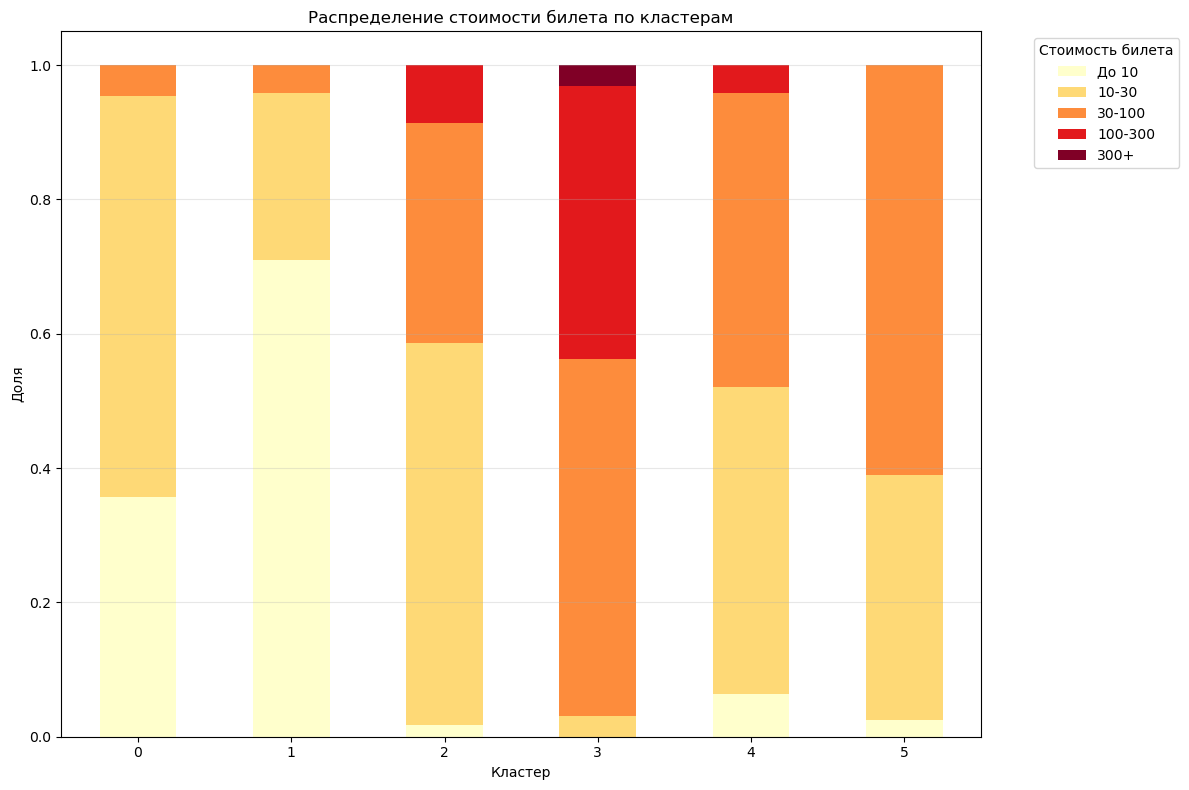

In [77]:
def categorize_fare(fare):
    if fare <= 10:
        return 'До 10'
    elif fare <= 30:
        return '10-30'
    elif fare <= 100:
        return '30-100'
    elif fare <= 300:
        return '100-300'
    else:
        return '300+'

df['FareCategory'] = df['Fare'].apply(categorize_fare)

plt.figure(figsize=(12, 8))
fare_by_cluster = pd.crosstab(df['Cluster'], df['FareCategory'], normalize='index')

fare_order = ['До 10', '10-30', '30-100', '100-300', '300+']
fare_by_cluster = fare_by_cluster[fare_order]

fare_by_cluster.plot(kind='bar', stacked=True, colormap='YlOrRd', figsize=(12, 8))
plt.title('Распределение стоимости билета по кластерам')
plt.xlabel('Кластер')
plt.ylabel('Доля')
plt.legend(title='Стоимость билета', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

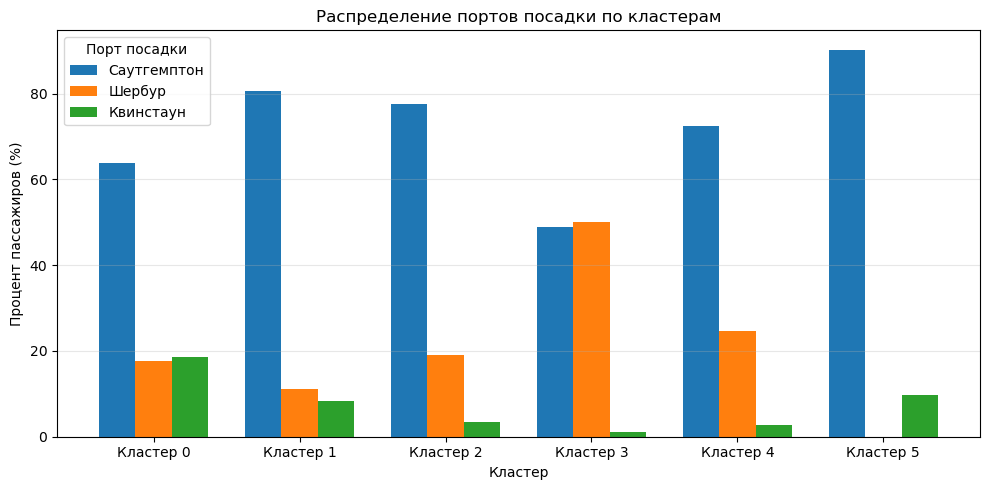


ГЛАВНОЕ О ПОРТАХ:
------------------------------
Кластер 0: 64% пассажиров из Саутгемптон
Кластер 1: 81% пассажиров из Саутгемптон
Кластер 2: 78% пассажиров из Саутгемптон
Кластер 3: 50% пассажиров из Шербур
Кластер 4: 73% пассажиров из Саутгемптон
Кластер 5: 90% пассажиров из Саутгемптон


In [78]:

df['Порт'] = df['Embarked'].map({
    0.0: 'Саутгемптон',
    1.0: 'Шербур', 
    2.0: 'Квинстаун'
})

clusters = sorted(df['Cluster'].unique())
ports = ['Саутгемптон', 'Шербур', 'Квинстаун']

data_for_plot = []

for cluster in clusters:
    cluster_data = df[df['Cluster'] == cluster]
    for port in ports:
        percent = (len(cluster_data[cluster_data['Порт'] == port]) / len(cluster_data)) * 100
        data_for_plot.append({
            'Кластер': f'Кластер {cluster}',
            'Порт': port,
            'Процент': percent
        })

plot_df = pd.DataFrame(data_for_plot)

plt.figure(figsize=(10, 5))

# Группированный bar chart
x = np.arange(len(clusters))
width = 0.25

for i, port in enumerate(ports):
    port_data = plot_df[plot_df['Порт'] == port]
    plt.bar(x + i*width, port_data['Процент'], width=width, label=port)

plt.xlabel('Кластер')
plt.ylabel('Процент пассажиров (%)')
plt.title('Распределение портов посадки по кластерам')
plt.xticks(x + width, [f'Кластер {c}' for c in clusters])
plt.legend(title='Порт посадки')
plt.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print("\nГЛАВНОЕ О ПОРТАХ:")
print("-" * 30)

for cluster in clusters:
    cluster_data = df[df['Cluster'] == cluster]
    main_port = cluster_data['Порт'].value_counts(normalize=True).idxmax()
    main_percent = cluster_data['Порт'].value_counts(normalize=True).max() * 100
    
    print(f"Кластер {cluster}: {main_percent:.0f}% пассажиров из {main_port}")

In [ ]:
Кластер 0 (193 пассажира): 
выживших: большинство
возраст: 19-30 лет
пол: мужчины
количество членов семьи: 1-2 человека 
стоимость билетов: дешевые 
порт: Саутгемптон

Кластер 1 (361 пассажир):
выживших: очень мало
возраст: 19-30 лет
пол: женщины
количество членов семьи: 1 человек
стоимость билетов: очень дешевые 
порт: Саутгемптон

Кластер 2 (58 пассажиров):
выживших: около 60%
возраст: 0-50 лет
пол: большинство мужчин
количество членов семьи: +3 человека
стоимость билетов: средние, дороже среднего
порт: Саутгемптон

Кластер 3 (96 пассажиров):
выживших: большинство
возраст: 19-50 лет
пол: мужчины
количество членов семьи: 1-2 человека
стоимость билетов: дороже среднего, дорогой
порт: Шербур, Саутгемптон

Кластер 4 (142 пассажира):
выживших: большинство
возраст: 31-51+ лет
пол: женщины
количество членов семьи: 1-2 человека
стоимость билетов: средний, дороже среднего
порт: Саутгемптон

Кластер 5 (41 пассажир):
выживших: очень мало
возраст: 0-18 лет
пол: женщины
количество членов семьи: 5+ человек
стоимость билетов: средний, дороже среднего
порт: Саутгемптон

Кластер 0 выжившие молодые одинокие мужчины низкого дохода
Кластер 1 погибшие молодые одинокие женщины низкого дохода
Кластер 2 семьи среднего класса со средней выживаемостью
Кластер 3 выжившие успешные мужчины
Кластер 4 погибшие состоятельные женщины средних лет
Кластер 5 погибшиемногодетные семьи с детьми

In [43]:
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN

sk_dbscan = DBSCAN(eps=3.0, min_samples=10) #eps - радиус, min_samples - минимальный размер кластера
sk_dbscan_res = sk_dbscan.fit_predict(df)

print(f"Найдено кластеров: {len(np.unique(sk_dbscan_res)) - (1 if -1 in sk_dbscan_res else 0)}")
print(f"Шумовых точек: {np.sum(sk_dbscan_res == -1)}")


Найдено кластеров: 4
Шумовых точек: 388


In [66]:
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN

sk_dbscan = DBSCAN(eps = 3.5, min_samples = 8)
sk_dbscan_res = sk_dbscan.fit_predict(df)

print(f"Найдено кластеров: {len(np.unique(sk_dbscan_res)) - (1 if -1 in sk_dbscan_res else 0)}") #без шума
print(f"Шумовых точек: {np.sum(sk_dbscan_res == -1)}")


Найдено кластеров: 5
Шумовых точек: 291


In [76]:
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN

sk_dbscan = DBSCAN(eps=3.5, min_samples=9)
sk_dbscan_res = sk_dbscan.fit_predict(df)

print(f"Найдено кластеров: {len(np.unique(sk_dbscan_res)) - (1 if -1 in sk_dbscan_res else 0)}") #без шума
print(f"Шумовых точек: {np.sum(sk_dbscan_res == -1)}")


Найдено кластеров: 4
Шумовых точек: 311


In [77]:
total_points = len(df)
noise_percent = (311 / total_points) * 100
print(f"Всего точек: {total_points}")
print(f"Процент шума: {noise_percent:.1f}%")

Всего точек: 891
Процент шума: 34.9%


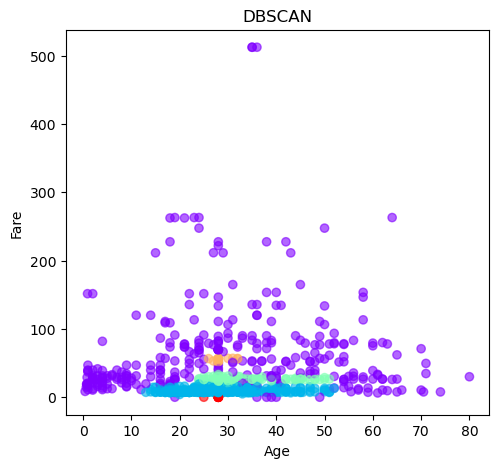

In [80]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(df["Age"], df["Fare"], c=sk_dbscan_res, cmap='rainbow', alpha=0.6)
plt.title('DBSCAN')
plt.xlabel("Age")
plt.ylabel("Fare")

plt.show()

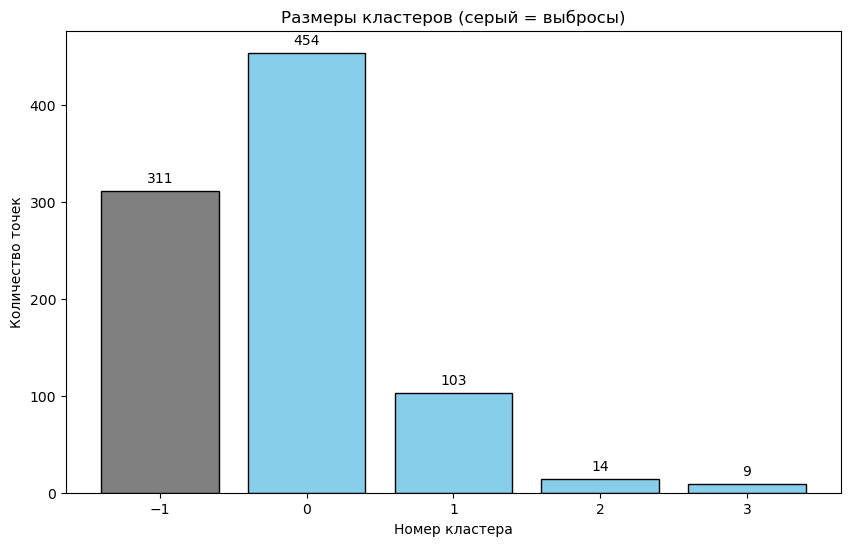

In [153]:
cluster_counts = pd.Series(sk_dbscan_res).value_counts().sort_index()
plt.figure(figsize=(10, 6))

colors = ['gray' if idx == -1 else 'skyblue' for idx in cluster_counts.index]
plt.bar(cluster_counts.index, cluster_counts.values, color=colors, edgecolor='black')

plt.title('Размеры кластеров (серый = выбросы)')
plt.xlabel('Номер кластера')
plt.ylabel('Количество точек')

for i, v in enumerate(cluster_counts.values):
    plt.text(cluster_counts.index[i], v + max(cluster_counts.values)*0.02, str(v), ha='center')

plt.show()

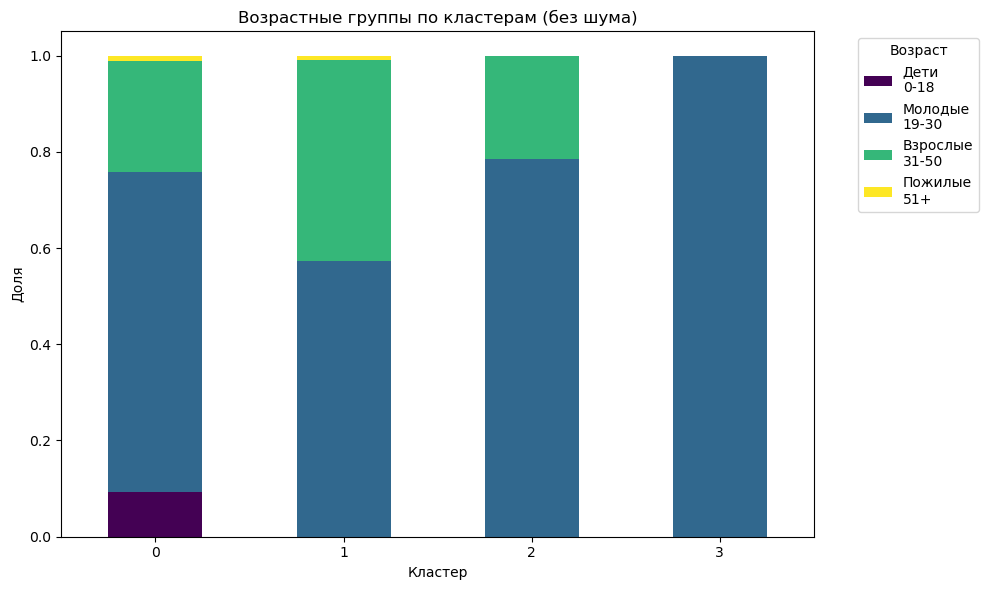

In [99]:
df_clusters_only = df_clustered[df_clustered['Cluster'] != -1].copy()

df_clusters_only['AgeGroup'] = pd.cut(df_clusters_only['Age'], 
                                      bins=[0, 18, 30, 50, 100], 
                                      labels=['Дети\n0-18', 'Молодые\n19-30', 
                                              'Взрослые\n31-50', 'Пожилые\n51+'])

age_by_cluster = pd.crosstab(df_clusters_only['Cluster'], df_clusters_only['AgeGroup'], normalize='index')

age_by_cluster.plot(kind='bar', stacked=True, colormap='viridis', figsize=(10, 6))
plt.title('Возрастные группы по кластерам (без шума)')
plt.xlabel('Кластер')
plt.ylabel('Доля')
plt.legend(title='Возраст', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

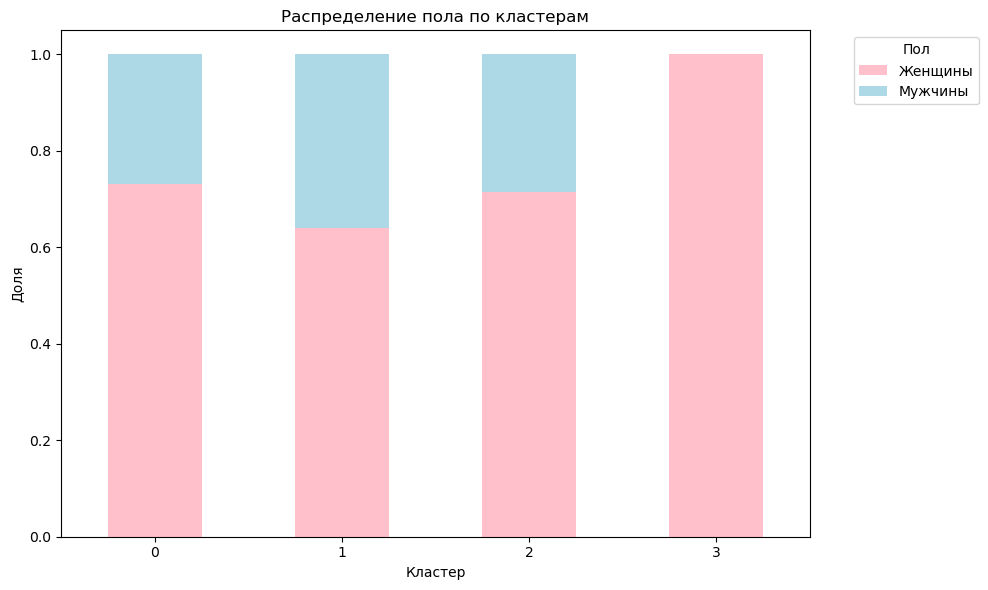

In [122]:
sex_by_cluster = pd.crosstab(df_clusters_only['Cluster'], df_clusters_only['Sex'], normalize='index')

ax = sex_by_cluster.plot(kind='bar', stacked=True, color=['pink', 'lightblue'], figsize=(10, 6))

ax.legend(['Женщины', 'Мужчины'], title='Пол', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title('Распределение пола по кластерам')
plt.xlabel('Кластер')
plt.ylabel('Доля')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

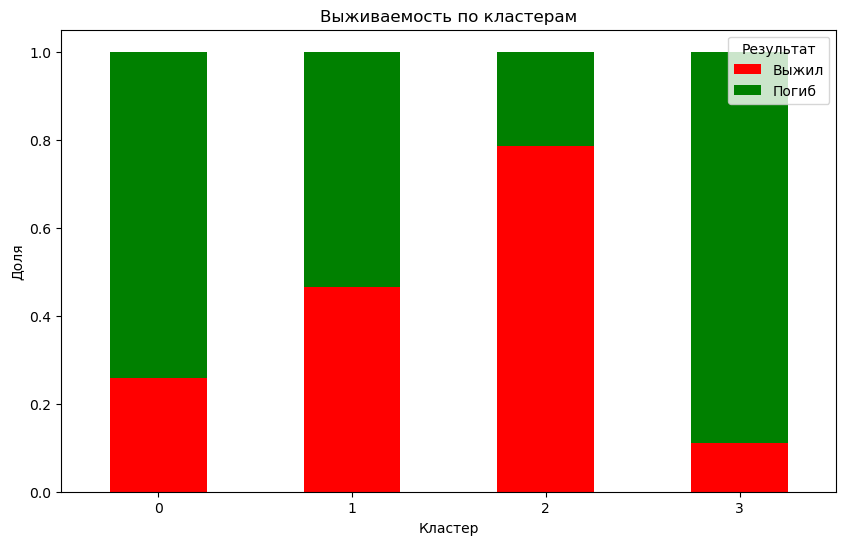

In [101]:
df_clusters_only['Survived_label'] = df_clusters_only['Survived'].map({0: 'Погиб', 1: 'Выжил'})
survival_by_cluster = pd.crosstab(df_clusters_only['Cluster'], df_clusters_only['Survived_label'], normalize='index')
survival_by_cluster.plot(kind='bar', stacked=True, color=['red', 'green'], figsize=(10, 6))
plt.title('Выживаемость по кластерам')
plt.xlabel('Кластер')
plt.ylabel('Доля')
plt.legend(title='Результат')
plt.xticks(rotation=0)
plt.show()

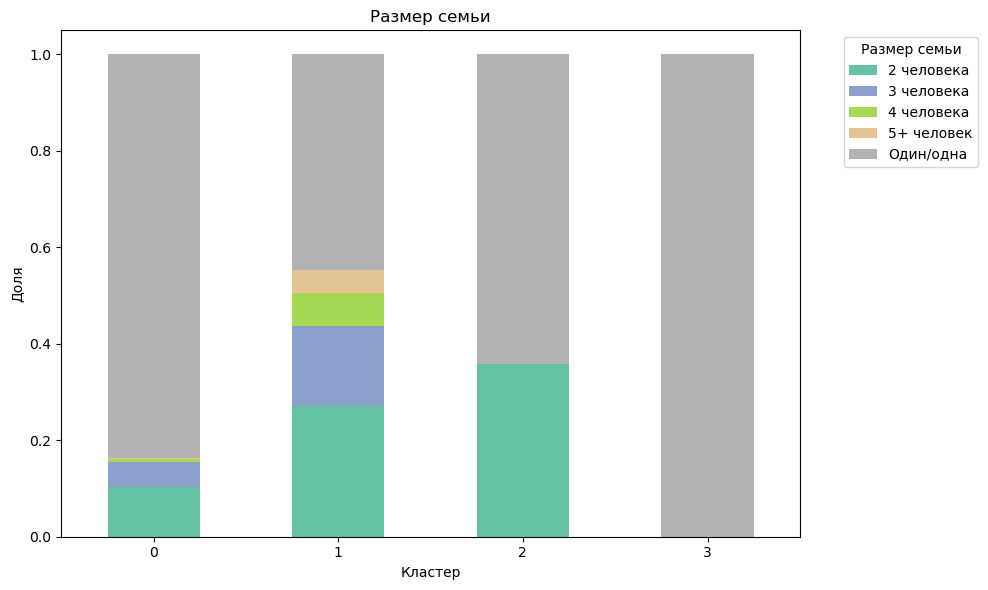

In [152]:
df_no_noise = df[df['Cluster'] != -1].copy()
df_no_noise['FamilySize'] = df_no_noise['SibSp'] + df_no_noise['Parch']
df_no_noise['FamilyCat'] = df_no_noise['FamilySize'].apply(lambda x: 
    ['Один/одна', '2 человека', '3 человека', '4 человека', '5+ человек'][min(x, 4)])

ax = pd.crosstab(df_no_noise['Cluster'], df_no_noise['FamilyCat'], normalize='index').plot(
    kind='bar', stacked=True, figsize=(10, 6), colormap='Set2', rot=0)

plt.title('Размер семьи')
plt.xlabel('Кластер')
plt.ylabel('Доля')

ax.legend(title='Размер семьи', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

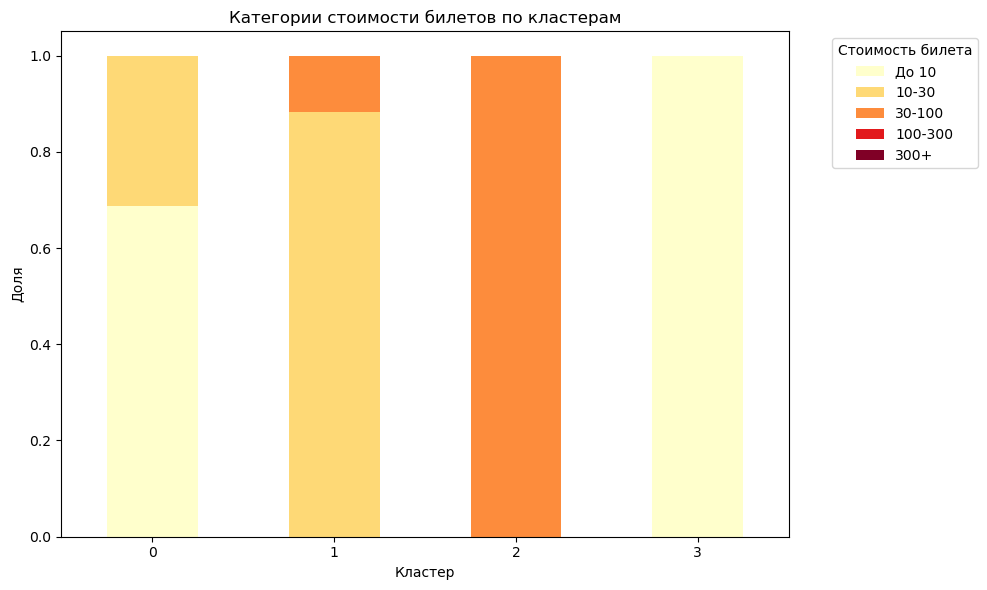

In [149]:
df['Cluster'] = sk_dbscan_res 
df_clusters_only = df[df['Cluster'] != -1]
clusters = sorted(df_clusters_only['Cluster'].unique())

def categorize_fare(fare):
    if fare <= 10:
        return 'До 10'
    elif fare <= 30:
        return '10-30'
    elif fare <= 100:
        return '30-100'
    elif fare <= 300:
        return '100-300'
    else:
        return '300+'

df['FareCategory'] = df['Fare'].apply(categorize_fare)

plt.figure(figsize=(10, 6))
fare_by_cluster = pd.crosstab(df_clusters_only['Cluster'], df_clusters_only['FareCategory'], normalize='index')

fare_order = ['До 10', '10-30', '30-100', '100-300', '300+']
fare_by_cluster = fare_by_cluster.reindex(columns=fare_order, fill_value=0)

fare_by_cluster.plot(kind='bar', stacked=True, colormap='YlOrRd', figsize=(10, 6))
plt.title('Категории стоимости билетов по кластерам')
plt.xlabel('Кластер')
plt.ylabel('Доля')
plt.legend(title='Стоимость билета', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

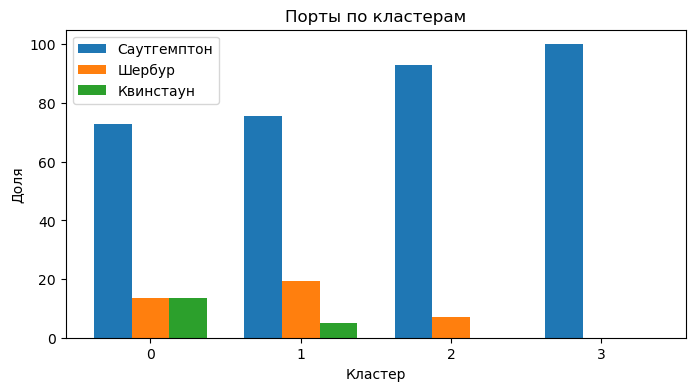

In [147]:
df_clusters_only = df[df['Cluster'] != -1]
clusters = sorted(df_clusters_only['Cluster'].unique())

df['Порт'] = df['Embarked'].map({0.0: 'Саутгемптон', 1.0: 'Шербур', 2.0: 'Квинстаун'})

plt.figure(figsize=(8, 4))

for i, port in enumerate(['Саутгемптон', 'Шербур', 'Квинстаун']):
    percents = [((df[df['Cluster'] == c]['Порт'] == port).mean() * 100) for c in clusters]
    plt.bar(np.arange(len(clusters)) + i*0.25, percents, width=0.25, label=port)

plt.xticks(np.arange(len(clusters)) + 0.25, [str(c) for c in clusters])
plt.xlabel('Кластер')
plt.ylabel('Доля')
plt.legend()
plt.title('Порты по кластерам')
plt.show()

In [ ]:
Кластер 0 (454 пассажира): 
выживших: большинство
возраст: 19-30 лет
пол: большинство женщин
количество членов семьи: 1 человек 
стоимость билетов: очень дешевые
порт: Саутгемптон

Кластер 1 (103 пассажира):
выживших: около 60%
возраст: 19-50 лет
пол: большинство женщин
количество членов семьи: 1-2 человека
стоимость билетов: дешевые 
порт: Саутгемптон

Кластер 2 (14 пассажиров):
выживших: очень мало
возраст: 19-30 лет
пол: большинство женщин
количество членов семьи: 1-2 человека
стоимость билетов: средние
порт: Саутгемптон

Кластер 3 (9 пассажиров):
выживших: большинство
возраст: 19-30 лет
пол: женщины
количество членов семьи: 1 человек
стоимость билетов: очень дешевые
порт: Саутгемптон

Выбросы: 311
Кластер 0 выжившие молодые одинокие женщины низкого дохода
Кластер 1 большинство вышивших молодых/средних лет одиноких женщин низкого дохода
Кластер 2 погибшие одинокие молодые женщины среднего класса
Кластер 3 выжившие молодые одинокие женщины низкого дохода

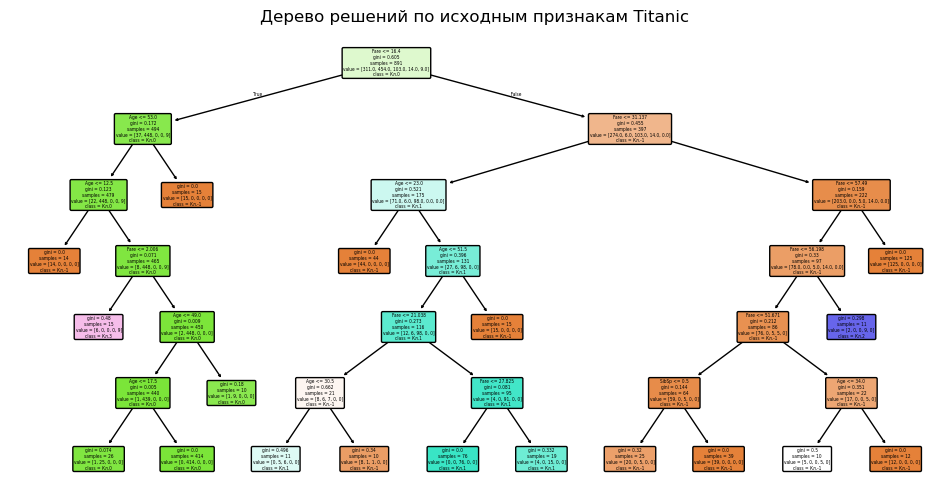

In [135]:
features = ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

X = df[features].copy()
y = df['Cluster']

tree = DecisionTreeClassifier(max_depth = 6, min_samples_leaf = 10, random_state = 42)
tree.fit(X, y)

plt.figure(figsize = (12, 6))
plot_tree(tree,
          feature_names = features,
          class_names = [f'Кл.{c}' for c in sorted(y.unique())],
          filled = True,
          rounded = True)
plt.title("Дерево решений по исходным признакам Titanic")
plt.show()

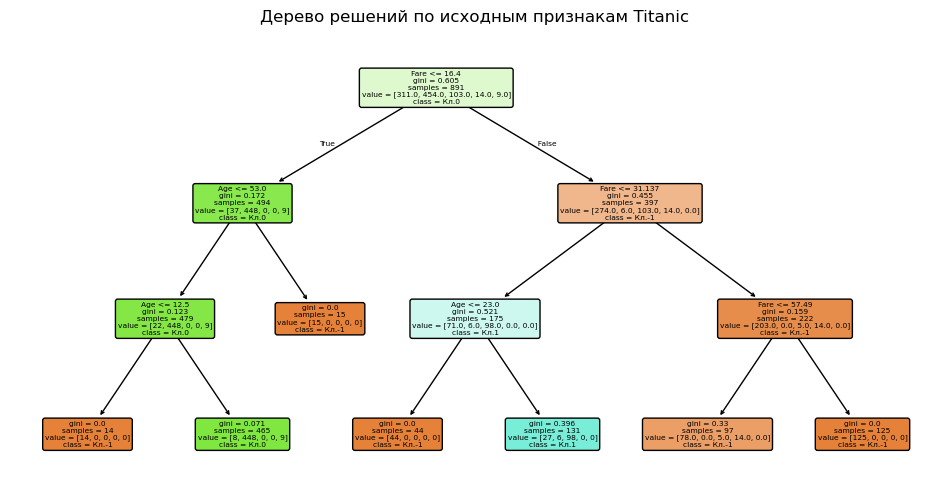

In [136]:
features = ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

X = df[features].copy()
y = df['Cluster']

tree = DecisionTreeClassifier(max_depth = 3, min_samples_leaf = 10, random_state = 42)
tree.fit(X, y)

plt.figure(figsize = (12, 6))
plot_tree(tree,
          feature_names = features,
          class_names = [f'Кл.{c}' for c in sorted(y.unique())],
          filled = True,
          rounded = True)
plt.title("Дерево решений по исходным признакам Titanic")
plt.show()

In [ ]:
Кластер -1(оранжевый): дешевые/средней ценовой категории билеты, люди возрастом 0-13 и 53+
Кластер 0(зеленый): дешевые билеты, люди возрастной категории 0-53
Кластер 1(голубой): билеты средней ценовой категории, люди возрастом 0-23